In [1]:
import os
import numpy as np
import numpy.ma as ma
import glob

import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib as mpl

import rasterio as rio
from rasterio.merge import merge
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.plot import plotting_extent
from shapely.geometry import mapping

import earthpy as et
import earthpy.spatial as es


In [2]:
# Function to calcualte NDVI

def normalized_diff(b1, b2):

    n_diff = (b1 - b2) / (b1 + b2)
    # Set inf values to nan and provide custom warning

    if np.isinf(n_diff).any():

        n_diff[np.isinf(n_diff)] = np.nan
    if np.isnan(n_diff).any():

        n_diff = np.ma.masked_invalid(n_diff)
        
    return n_diff

In [3]:
os.getcwd()

'/Users/shannonwhite/git/volcano-risk-analysis/notebooks'

In [4]:
os.chdir('/Users/shannonwhite/git/data/Landsat')

In [5]:
# Import boundary 

boundary_eruption = gpd.read_file(
    '/Users/shannonwhite/git/area_point_layer/POLYGON.shp')

# Set the boundary for plotting and cropping 

boundary_bounds = tuple(boundary_eruption.total_bounds)

# April 12 2018 / April 19 2018 
two seperate dates used to get the entire scene 
* **band 4 = red** 
* **band 5 = NIR** 

### Red bands - Pre

In [6]:
# Mosaic (red bands) together to dissolve distortion -

landsat1_glob = glob.glob ("/Users/shannonwhite/git/data/Landsat/outputsL/pre/*SRB4*")
landsat1_glob.sort()

In [7]:
# Red band mosaic
landsat_red_pre = []

In [8]:
for fp in landsat1_glob:
    src1 = rio.open(fp)
    landsat_red_pre.append(src1)
    
landsat_red_pre

[<open DatasetReader name='/Users/shannonwhite/git/data/Landsat/outputsL/pre/LC08_HI_003002_20180412_20181120_C01_V01_SRB4.tif' mode='r'>,
 <open DatasetReader name='/Users/shannonwhite/git/data/Landsat/outputsL/pre/LC08_HI_003002_20180419_20181120_C01_V01_SRB4.tif' mode='r'>,
 <open DatasetReader name='/Users/shannonwhite/git/data/Landsat/outputsL/pre/LC08_HI_004002_20180412_20181120_C01_V01_SRB4.tif' mode='r'>,
 <open DatasetReader name='/Users/shannonwhite/git/data/Landsat/outputsL/pre/LC08_HI_004002_20180419_20181120_C01_V01_SRB4.tif' mode='r'>]

In [10]:
landsat_redpre_out_meta = src1.meta.copy()

In [12]:
# Merge files 
landsat_red_pre, landsat_pre_out_trans = merge(landsat_red_pre, bounds = boundary_bounds)

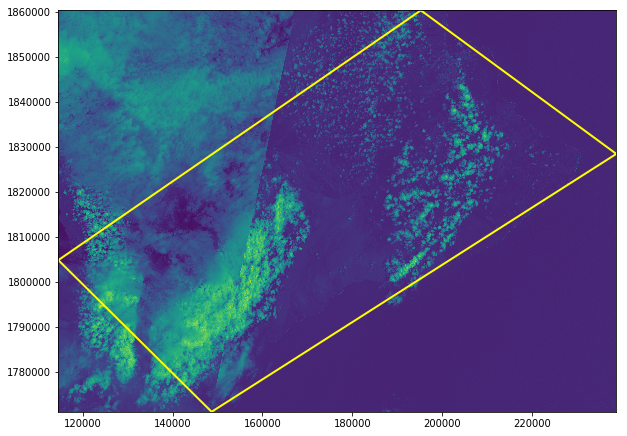

In [13]:
# Plot data to visualize

landsat_extent = plotting_extent(landsat_red_pre[0], transform = landsat_pre_out_trans)

fig,ax1=plt.subplots(figsize=(10,10))

im=ax1.imshow(landsat_red_pre[0], extent=landsat_extent)

boundary_eruption.plot(ax=ax1, color='None',
                       edgecolor='yellow', linewidth=2)
        
plt.show()

In [14]:
# Write out pre-red Landsat
out_path_landsat_red_pre='/Users/shannonwhite/git/data/Landsat/landsat_pre_red.tif'

with rio.open(out_path_landsat_red_pre,"w",**landsat_redpre_out_meta) as dest:
    dest.write(landsat_red_pre)

### NIR bands -  pre
*same process*

In [15]:
# Mosaic together (NIR bands) 

landsat2_glob = glob.glob ("/Users/shannonwhite/git/data/Landsat/outputsL/pre/*SRB5*")
landsat2_glob.sort()

In [16]:
# NIR band mosaic
pre_nir_landsat_to_mosaic = []

In [17]:
for nir in landsat2_glob:
    src2 = rio.open(nir)
    pre_nir_landsat_to_mosaic.append(src2)
    
pre_nir_landsat_to_mosaic

[<open DatasetReader name='/Users/shannonwhite/git/data/Landsat/outputsL/pre/LC08_HI_003002_20180412_20181120_C01_V01_SRB5.tif' mode='r'>,
 <open DatasetReader name='/Users/shannonwhite/git/data/Landsat/outputsL/pre/LC08_HI_003002_20180419_20181120_C01_V01_SRB5.tif' mode='r'>,
 <open DatasetReader name='/Users/shannonwhite/git/data/Landsat/outputsL/pre/LC08_HI_004002_20180412_20181120_C01_V01_SRB5.tif' mode='r'>,
 <open DatasetReader name='/Users/shannonwhite/git/data/Landsat/outputsL/pre/LC08_HI_004002_20180419_20181120_C01_V01_SRB5.tif' mode='r'>]

In [18]:
landsat_nirpre_mosaic, landsat_nir_out_trans = merge(pre_nir_landsat_to_mosaic)

In [19]:
pre_nir_landsat1_out_meta = src2.meta.copy()

In [20]:
pre_nir_landsat_to_mosaic, out_trans2 = merge(pre_nir_landsat_to_mosaic, bounds = boundary_bounds)

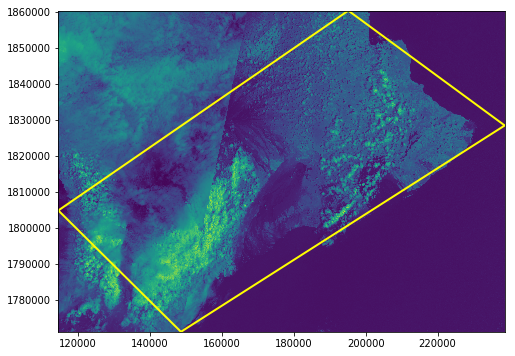

In [21]:
landsat_extent = plotting_extent(pre_nir_landsat_to_mosaic[0], transform = out_trans2)

fig,ax1=plt.subplots(figsize=(8,8))

im=ax1.imshow(pre_nir_landsat_to_mosaic[0], extent=landsat_extent)

boundary_eruption.plot(ax=ax1, color='None',
                       edgecolor='yellow', linewidth=2)
        
plt.show()

In [22]:
out_path2 = '/Users/shannonwhite/git/data/Landsat/outputsL/landsat_pre_nir.tif'
with rio.open(out_path2, "w", **pre_nir_landsat1_out_meta) as dest:
    dest.write(pre_nir_landsat_to_mosaic)

# December 8 2018 / December 15 2018

### Red bands - post 

In [23]:
# Mosaic together (red bands) to dissolve distortion
landsat3_glob = glob.glob ("/Users/shannonwhite/git/data/Landsat/outputsL/post/*SRB4*")
landsat3_glob.sort()

In [24]:
# red band mosaic
post_red_landsat_to_mosaic = []

In [25]:
for red2 in landsat3_glob:
    src3 = rio.open(red2)
    post_red_landsat_to_mosaic.append(src3)
    
post_red_landsat_to_mosaic

[<open DatasetReader name='/Users/shannonwhite/git/data/Landsat/outputsL/post/LC08_HI_003002_20181208_20181230_C01_V01_SRB4.tif' mode='r'>,
 <open DatasetReader name='/Users/shannonwhite/git/data/Landsat/outputsL/post/LC08_HI_003002_20181215_20181229_C01_V01_SRB4.tif' mode='r'>,
 <open DatasetReader name='/Users/shannonwhite/git/data/Landsat/outputsL/post/LC08_HI_004002_20181208_20181230_C01_V01_SRB4.tif' mode='r'>,
 <open DatasetReader name='/Users/shannonwhite/git/data/Landsat/outputsL/post/LC08_HI_004002_20181215_20181229_C01_V01_SRB4.tif' mode='r'>]

In [26]:
post_red_landsat_out_meta = src3.meta.copy()

In [27]:
# Merge files 
post_red_landsat_to_mosaic, out_trans3 = merge(post_red_landsat_to_mosaic, bounds = boundary_bounds)

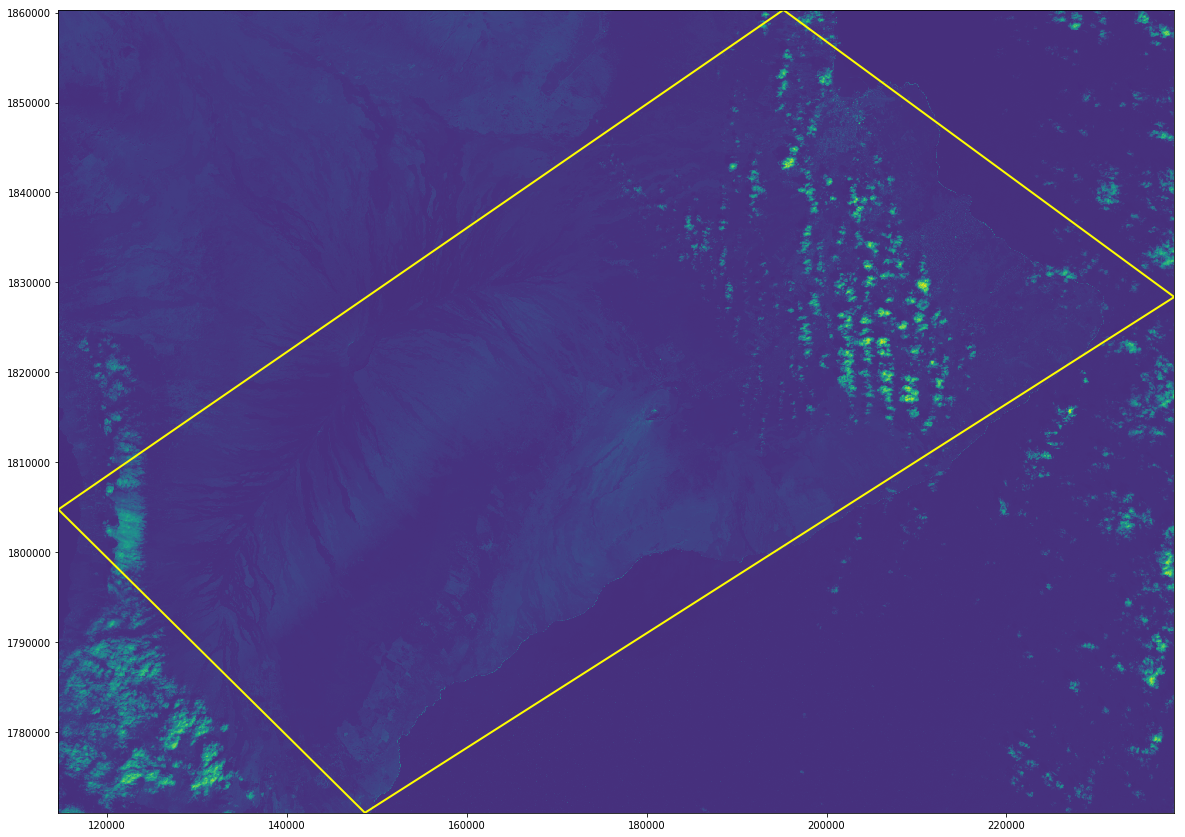

In [28]:
landsat_extent = plotting_extent(post_red_landsat_to_mosaic[0], transform = out_trans3)

fig,ax1=plt.subplots(figsize=(10,10))

im=ax1.imshow(post_red_landsat_to_mosaic[0], extent=landsat_extent)

boundary_eruption.plot(ax=ax1, color='None',
                       edgecolor='yellow', linewidth=2)
        
plt.show()

In [29]:
out_path3 = '/Users/shannonwhite/git/data/Landsat/outputsL/landsat_post_red.tif'
with rio.open(out_path3, "w", **post_red_landsat_out_meta) as dest:
    dest.write(post_red_landsat_to_mosaic)

### NIR bands - post 

In [30]:
# mosaic together (NIR bands) to dissolve distortion
landsat4_glob = glob.glob ("/Users/shannonwhite/git/data/Landsat/outputsL/post/*SRB5*")
landsat4_glob.sort()

In [31]:
# NIR band mosaic
post_nir_landsat_to_mosaic = []

In [32]:
for nir2 in landsat4_glob:
    src4 = rio.open(nir2)
    post_nir_landsat_to_mosaic.append(src4)

In [33]:
post_nir_landsat_out_meta = src4.meta.copy()

In [34]:
post_nir_landsat_to_mosaic, out_trans4 = merge(post_nir_landsat_to_mosaic, bounds = boundary_bounds)

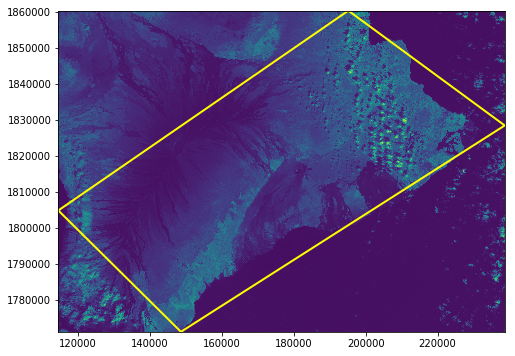

In [35]:
landsat_extent = plotting_extent(post_nir_landsat_to_mosaic[0], transform = out_trans4)

fig,ax1=plt.subplots(figsize=(8,8))

im=ax1.imshow(post_nir_landsat_to_mosaic[0], extent=landsat_extent)

boundary_eruption.plot(ax=ax1, color='None',
                       edgecolor='yellow', linewidth=2)
        
plt.show()

In [36]:
out_path4 = '/Users/shannonwhite/git/data/Landsat/outputsL/landsat_post_nir.tif'
with rio.open(out_path4, "w", **post_nir_landsat_out_meta) as dest:
    dest.write(post_nir_landsat_to_mosaic)

In [37]:
# Set masked value for pre and post scenes 

pre_nir_landsat_to_mosaic_nodata = ma.masked_where(
        pre_nir_landsat_to_mosaic < 0.0, pre_nir_landsat_to_mosaic)

landsat_red_pre_nodata = ma.masked_where(
        landsat_red_pre < 0.0, landsat_red_pre)

post_nir_landsat_to_mosaic_nodata = ma.masked_where(
        post_nir_landsat_to_mosaic < 0.0, post_nir_landsat_to_mosaic)

post_red_landsat_nodata = ma.masked_where(
        post_red_landsat_to_mosaic < 0.0, post_red_landsat_to_mosaic)



In [38]:
# Use norm_diff function to calculate ndvi for pre scene

## NDVI = (NIR - Red) / (NIR + Red)

pre_ndvi = normalized_diff (pre_nir_landsat_to_mosaic,landsat_red_pre)
pre_ndvi_range = ma.masked_outside(pre_ndvi, -1, 1)


/Users/shannonwhite/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


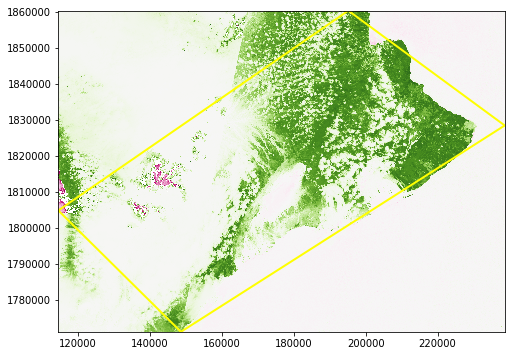

In [39]:
# Plot pre NDVI 

fig,ax1=plt.subplots(figsize=(8,8))

im=ax1.imshow(pre_ndvi_range[0], 
              cmap='PiYG',
              vmin=-1,
              vmax=1,
              extent=landsat_extent)


boundary_eruption.plot(ax=ax1, color='None',
                       edgecolor='yellow', linewidth=2)

        
plt.show()

In [40]:
# Write out pre ndvi

post_nir_landsat_out_meta['dtype'] = "float64"

out_path5 = '/Users/shannonwhite/git/data/Landsat/outputsL/landsat_pre_ndvi.tif'
with rio.open(out_path5, "w", **post_nir_landsat_out_meta) as dest:
    dest.write(pre_ndvi)

In [41]:
# Create meta object to write out dndvi below 

with rio.open("/Users/shannonwhite/git/data/Landsat/outputsL/landsat_pre_ndvi.tif") as pre_ndvi:
    ndvi_landsat = pre_ndvi.read()
    ndvi_meta_l= pre_ndvi.profile

In [42]:
# Use norm_diff to calcualte post ndvi 

post_ndvi = normalized_diff (post_nir_landsat_to_mosaic, post_red_landsat_to_mosaic)
post_ndvi_range = ma.masked_outside(post_ndvi, -1, 1)



/Users/shannonwhite/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


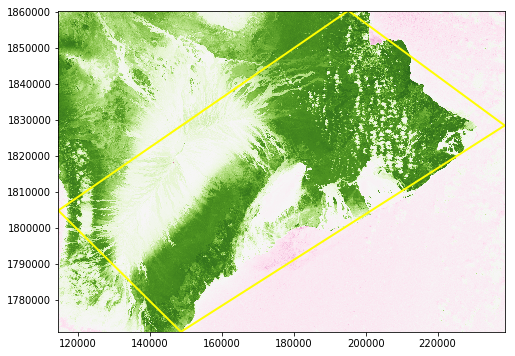

In [43]:
fig,ax1=plt.subplots(figsize=(8,8))

im=ax1.imshow(post_ndvi_range[0], 
              cmap='PiYG',
              vmin=-1,
              vmax=1,
              extent=landsat_extent)


boundary_eruption.plot(ax=ax1, color='None',
                       edgecolor='yellow', linewidth=2)

        
plt.show()

In [44]:
# Use ravel to change to two dimensions for historgam viewing

post_ndvi_r = post_ndvi_range.ravel()
pre_ndvi_r = pre_ndvi_range.ravel()

/Users/shannonwhite/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/shannonwhite/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


(array([  5.40600000e+03,   9.75200000e+03,   1.30560000e+04,
          5.96700000e+03,   3.10783400e+06,   6.05207600e+06,
          7.67067000e+05,   5.83222000e+05,   9.60808000e+05,
          7.40196000e+05]),
 array([-0.99646018, -0.79681416, -0.59716814, -0.39752212, -0.19787611,
         0.00176991,  0.20141593,  0.40106195,  0.60070796,  0.80035398,  1.        ]),
 <a list of 10 Patch objects>)

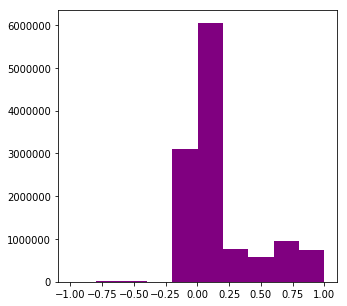

In [45]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(pre_ndvi_r, color='purple')

/Users/shannonwhite/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/shannonwhite/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


(array([  4.60000000e+01,   5.90000000e+01,   1.26000000e+03,
          1.20545000e+05,   3.96912000e+06,   2.54444800e+06,
          1.00432000e+06,   1.25648200e+06,   1.58660300e+06,
          1.81808200e+06]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

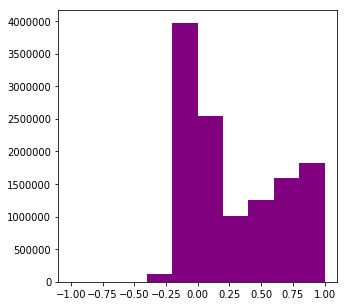

In [46]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(post_ndvi_r, color='purple')

In [47]:
# Calculate dNDVI (= pre - post)

dndvi = pre_ndvi_range - post_ndvi_range

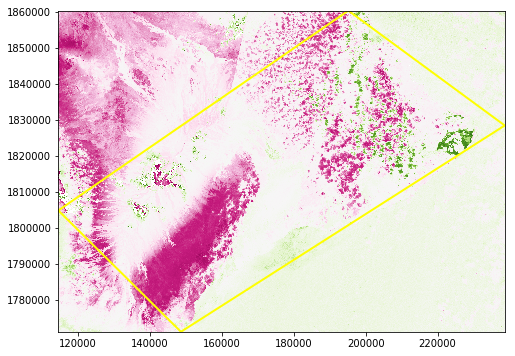

In [48]:
fig,ax1=plt.subplots(figsize=(8,8))


im=ax1.imshow(dndvi[0], 
              cmap='PiYG',
              vmin=-1,
              vmax=1,
              extent=landsat_extent)


boundary_eruption.plot(ax=ax1, color='None',
                       edgecolor='yellow', linewidth=2)

        
plt.show()

In [49]:
# Use ravel to create two-dimensions for histogram viewing 

dndvi_r = dndvi.ravel()

/Users/shannonwhite/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/shannonwhite/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


(array([  6.70000000e+03,   5.79094000e+05,   1.27412700e+06,
          1.54345000e+06,   6.85376400e+06,   1.83653300e+06,
          9.85210000e+04,   5.67540000e+04,   9.97700000e+03,
          6.36800000e+03]),
 array([-1.27987573, -1.00458211, -0.7292885 , -0.45399488, -0.17870127,
         0.09659235,  0.37188597,  0.64717958,  0.9224732 ,  1.19776681,
         1.47306043]),
 <a list of 10 Patch objects>)

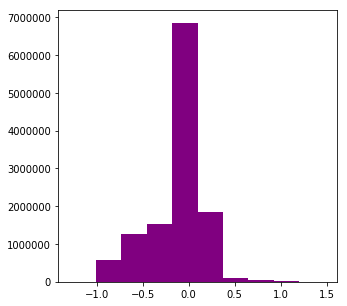

In [50]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(dndvi_r, color='purple')

In [51]:
# Write out dndvi image 

out_path_dndvi = '/Users/shannonwhite/git/data/Landsat/outputsL/dndvi_landsat.tif'

with rio.open(out_path_dndvi,"w",**ndvi_meta_l) as dest:
    dest.write(dndvi)